# ДЗ 1. Shoes_Data
### Таня Казакова

### Устанавливаем полезное

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import (axes,axis,title,legend,figure,
                               xlabel,ylabel,xticks,yticks,
                               xscale,yscale,text,grid,
                               plot,scatter,errorbar,hist,polar,
                               contour,contourf,colorbar,clabel,
                               imshow)
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from numpy import (linspace,logspace,zeros,ones,outer,meshgrid,
                   pi,sin,cos,sqrt,exp)
from numpy.random import normal
%matplotlib inline

import collections
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.svm import LinearSVR
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_absolute_error, mean_squared_error, f1_score, accuracy_score, confusion_matrix
from scipy.sparse import coo_matrix, hstack
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [3]:
Shoes_Data = pd.read_csv('Shoes_Data.csv')

In [4]:
Shoes_Data.head(5)

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,₹279.00,2.9 out of 5 stars,2389 ratings,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men
1,Bourge Men's Loire-z126 Running Shoes,₹479.00,3.9 out of 5 stars,11520 ratings,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men
2,T-Rock Men's Sneaker,₹430.00,3.3 out of 5 stars,1251 ratings,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
3,Robbie jones Sneakers Casual Canvas Fabric Col...,₹499.00,4.2 out of 5 stars,3 ratings,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men
4,Sparx Men's Sd0323g Sneakers,₹499.00,4.2 out of 5 stars,20110 ratings,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men


## Приведение данных к нормальному виду (часть 1)

price: "₹279.00" => 279.0

rating: "2.9 out of 5 stars" => 2.9

total_reviews: "2389 ratings" => 2389

In [5]:
sc = StandardScaler()
Shoes_Data['rating'] = Shoes_Data['rating'].apply(lambda x: float(x[:3]))
Shoes_Data['price'] = Shoes_Data['price'].apply(lambda x: float(x[1:]))
Shoes_Data['total_reviews'] = Shoes_Data['total_reviews'].apply(lambda x: int(x.split()[0]))
Shoes_Data['Shoe Type'] = Shoes_Data['Shoe Type'].apply(lambda x: 1 if x=='Men' else 0)

# Чуть ниже посмотрим, есть ли корреляция между длинами и капсом с ценой
Shoes_Data['len_of_title'] = Shoes_Data['title'].apply(lambda x: len(x))
Shoes_Data['len_of_description'] = Shoes_Data['product_description'].apply(lambda x: len(x))
Shoes_Data['supall_description'] = Shoes_Data['product_description'].apply(lambda x: sum(map(str.isupper, x))/len(x))

In [6]:
Shoes_Data.head(5)

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type,len_of_title,len_of_description,supall_description
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,279.0,2.9,2389,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,1,47,222,0.040541
1,Bourge Men's Loire-z126 Running Shoes,479.0,3.9,11520,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,1,37,78,0.025641
2,T-Rock Men's Sneaker,430.0,3.3,1251,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,1,20,398,0.017588
3,Robbie jones Sneakers Casual Canvas Fabric Col...,499.0,4.2,3,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,1,72,576,0.173611
4,Sparx Men's Sd0323g Sneakers,499.0,4.2,20110,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,1,28,1030,0.017476


# Задание 1. Цена по описанию

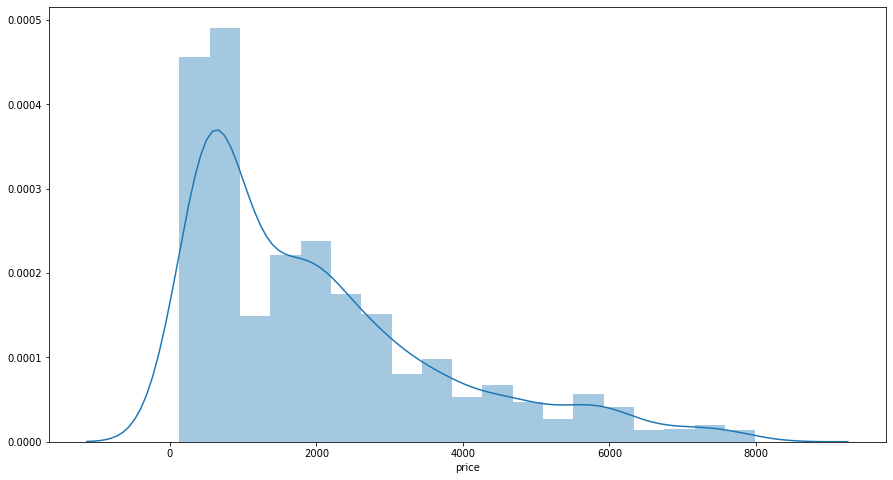

In [7]:
plt.figure(figsize=(15,8))
sns_plot = sns.distplot(Shoes_Data['price'])
fig = sns_plot.get_figure()
# Будем помнить, что обуви до 1000 сильно больше.

## Смотрим, что есть в текстовых ячейках

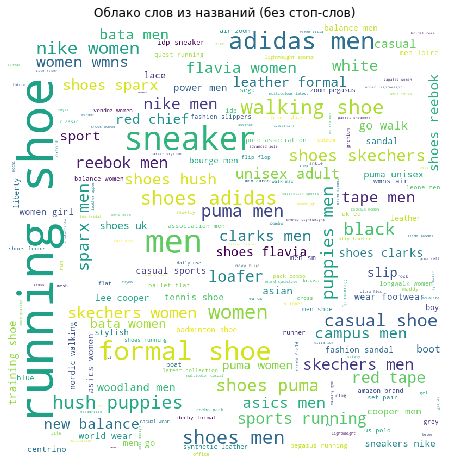

In [8]:
# Облако из названий
dop_stop = []
stops = set(stopwords.words('english') + dop_stop)
titles = ' '.join([word for word in Shoes_Data['title'].values if word not in stops])
wordcloud = WordCloud(background_color='white',
                      width=800,
                      height=800).generate(titles.lower())
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Облако слов из названий (без стоп-слов)')
plt.show()

In [9]:
brands = ['adidas', 'puma', 'reebok', 'bata', 'nike', 'clarks', 'flavia', 'asics', 'new balance', 'campus', 'puppies', 'red chief', 'skechers', 'red tape', 'sparx', 'cooper', 'bourge']

def func(x):
    x = x.lower()
    for i in range(len(brands)):
        if brands[i] in x:
            return i+1
Shoes_Data['brand'] = Shoes_Data['title'].apply(func)
Shoes_Data['brand'] = Shoes_Data['brand'].fillna(0)

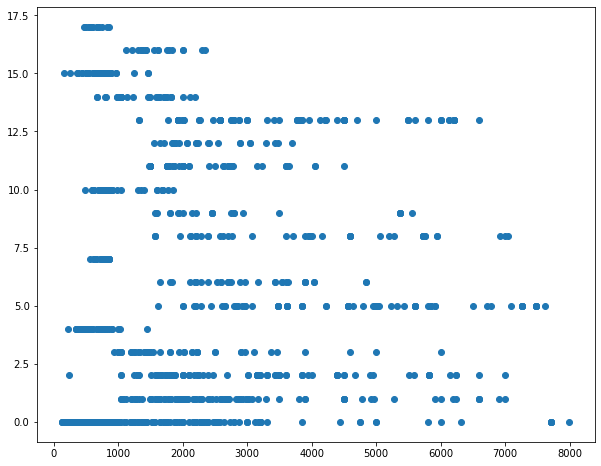

In [10]:
plt.figure(figsize=(10, 8))
plt.scatter(Shoes_Data['price'], Shoes_Data['brand'])
plt.show()

#### Получается, что указание популярного бренда в названии коррелирует с ценой, есть "дешёвые" бренды, есть "средней ценовой категории", есть "примерно всех ценовых категорий". Будем использовать бренд при предсказании.

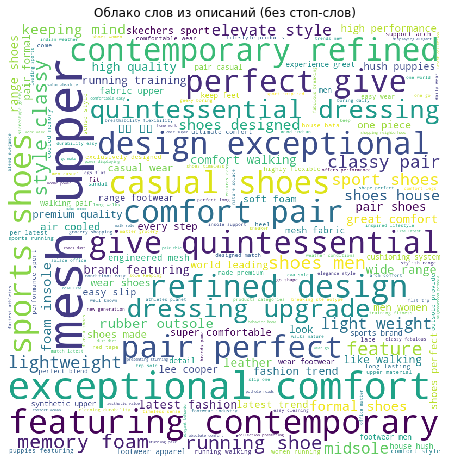

In [11]:
# Облако из описаний
dop_stop = ['shoe']
stops = set(stopwords.words('english') + dop_stop)
descriptions = ' '.join(Shoes_Data['product_description'].values)
wordcloud = WordCloud(background_color='white',
                      width=800,
                      height=800,
                      stopwords=stops).generate(descriptions.lower())
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Облако слов из описаний (без стоп-слов)')
plt.show()

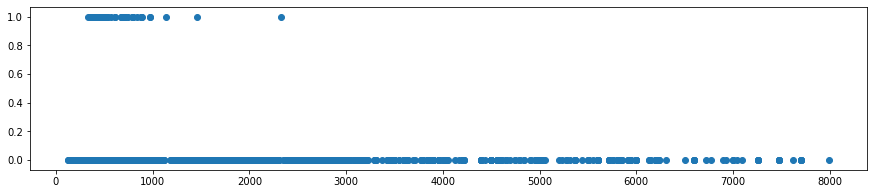

In [12]:
word = 'latest fashion'
Shoes_Data['word'] = Shoes_Data['product_description'].apply(lambda x: 1 if word in x.lower() else 0)
plt.figure(figsize=(15, 3))
plt.scatter(Shoes_Data['price'], Shoes_Data['word'])
plt.show()
#quintessential, perfect, latest fashion, refined design, keeping, fashion trend - дешёво
#exceptional, formal, house - дёшево
#casual, elevate - средне-дёшево

#### Есть слова, которые употребляются при описании дешёвой обуви, и не употребляются для дорогой. Если будет желание улучшить работу модели, можно будет добавить параметр про это.

### Посмотрим, что у нас сейчас коррелирует с ценой

In [13]:
Task1 = Shoes_Data[['title', 'brand', 'product_description', 'Shoe Type',
                    'len_of_title', 'len_of_description', 'supall_description', 'price']]

In [14]:
Task1.corr()

,brand,Shoe Type,len_of_title,len_of_description,supall_description,price
brand,1.000000,0.036547,-0.204800,0.157987,-0.120550,0.153624
Shoe Type,0.036547,1.000000,-0.112808,-0.134387,0.080990,-0.169900
len_of_title,-0.204800,-0.112808,1.000000,0.071238,-0.007342,-0.045486
len_of_description,0.157987,-0.134387,0.071238,1.000000,-0.067535,0.167379
supall_description,-0.120550,0.080990,-0.007342,-0.067535,1.000000,-0.024258
price,0.153624,-0.169900,-0.045486,0.167379,-0.024258,1.000000


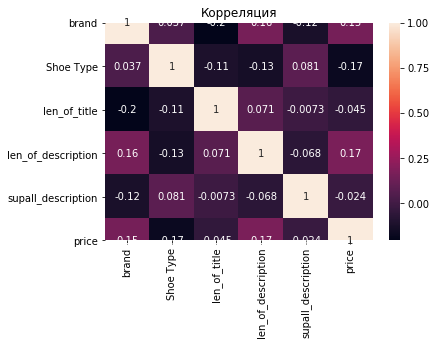

In [15]:
fig, ax = plt.subplots()
sns.heatmap(data=Task1.corr(), 
            annot=True, ax=ax)
plt.title("Корреляция")
plt.show()

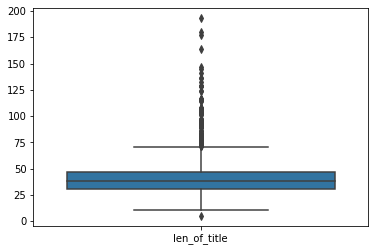

In [16]:
ax = sns.boxplot(data=Task1[['len_of_title']])
# Если захотеть, можно подумать о выбросах и т.д.

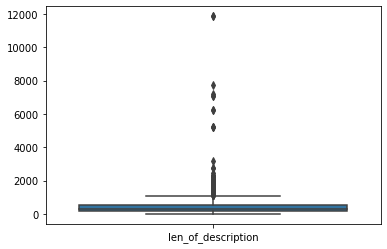

In [17]:
ax = sns.boxplot(data=Task1[['len_of_description']])
# Если захотеть, можно подумать о выбросах и т.д.

#### Удаляем дубликаты

In [18]:
# Task1.index[Task1.duplicated(subset=['title', 'product_description', 'Shoe Type', 'price'])]
# => Int64Index([ 140,  142,  144,  160,  177,  184,  193,  199,  214,  216,
#            ...
#            1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229],
#           dtype='int64', length=230)

Task1 = Task1.drop_duplicates(subset=['title', 'product_description', 'Shoe Type', 'price'], keep='first')

# Task1.index[Task1.duplicated(subset=['title', 'product_description', 'Shoe Type', 'price'])]
# => Int64Index([], dtype='int64')

#### Чистим. Тексты => леммы из латинских букв через пробел без стопслов

In [19]:
lemmatizer = WordNetLemmatizer()
def cleantext(text):
    text = text
    tok_text = word_tokenize(text)
    words = [w.lower() for w in tok_text if w.isalpha()] # это чистит от రన్నింగ్ и др.
    lemms = [lemmatizer.lemmatize(w) for w in words if w not in stopwords.words('english')]
    return ' '.join(lemms)

Task1['clean_description'] = Task1['product_description'].apply(lambda x: cleantext(x))

В итоге: поняли, что кроме описания можно использовать бренд, тип обувви (м/ж), длину описания.

Удалили дубликаты. Текст превратили в леммы из латинских букв через пробел без стопслов, потому что раз мы не учитываем контекст, форма слова не очень важна. Меньше разных слов - меньше памяти тратится. Так меньше неважного влияет на результат.

Из названий узнали бренд (обозначили числом).

## Пробуем модели (регрессия)
### BoW

In [20]:
BoW_vectorizer = CountVectorizer(max_features=1000, min_df=5, max_df=0.4, ngram_range=(1,2))

Task1[['brand', 'Shoe Type', 'len_of_description']] = sc.fit_transform(Task1[['brand',  # Стандартизируем
                                                                              'Shoe Type',
                                                                              'len_of_description']])
X = Task1[['clean_description', 'brand', 'Shoe Type', 'len_of_description']]
y = Task1['price']

X_train_manycols, X_test_manycols, y_train, y_test = train_test_split(X, y, random_state=42)

X_train_BoW = BoW_vectorizer.fit_transform(X_train_manycols['clean_description'])

X_train = hstack((X_train_BoW, X_train_manycols['brand'][:,None],
                  X_train_manycols['Shoe Type'][:,None],
                  X_train_manycols['len_of_description'][:,None]))
# Добавили к разреженной матрице_BoW другие важные параметры, и показатели улучшились

In [21]:
regressor = LinearRegression()

linreg_params = {'fit_intercept': [True, False],
                'normalize': [True, False]
                }

grid_search = GridSearchCV(regressor,
                           param_grid=linreg_params,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1)
# Используем кросс-валидацию :)

grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

/Users/tbkazakova/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


Best score: -2989.9280824850002
Best parameters: {'fit_intercept': False, 'normalize': True}


In [22]:
regressor = Ridge()

ridge_params = {'alpha': [0.05, 0.1, 0.3, 0.5, 1, 2, 3, 4, 10, 30, 35, 40, 100],
                'fit_intercept': [True, False],
                'normalize': [True, False],
                'solver': ['sag', 'sparse_cg'],
                'random_state': [None, 0]
                }

grid_search = GridSearchCV(regressor,
                           param_grid=ridge_params,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: -850.6711943643531
Best parameters: {'alpha': 40, 'fit_intercept': True, 'normalize': False, 'random_state': None, 'solver': 'sag'}


/Users/tbkazakova/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/Users/tbkazakova/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:739: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '


In [23]:
regressor = Lasso()

lasso_params = {'alpha': [0.5, 1, 5, 10, 15, 20, 30],
                'fit_intercept': [True, False],
                'normalize': [True, False],
                'precompute': [False],
                'positive': [True, False]
                }

grid_search = GridSearchCV(regressor,
                           param_grid=lasso_params,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
# For numerical reasons, using alpha = 0 with the Lasso object is not advised.
# Given this, you should use the LinearRegression object.

Best score: -884.7946517015444
Best parameters: {'alpha': 10, 'fit_intercept': True, 'normalize': False, 'positive': False, 'precompute': False}


/Users/tbkazakova/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


In [24]:
regressor = KNeighborsRegressor()
knr_params = {'n_neighbors': [3, 4, 5, 6, 10],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [1, 25, 30, 35],
              'p': [1, 2, 3],
              'metric': ['cityblock', 'euclidean', 'l1', 'l2', 'manhattan']
                }

grid_search = GridSearchCV(regressor,
                           param_grid=knr_params,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: -864.3970095013286
Best parameters: {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'euclidean', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [25]:
regressor = LinearSVR()
linsvr_params = {'C': [0.5, 1, 10, 15, 25, 30, 35, 50],
                'fit_intercept': [True, False],
                'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive']
                }

grid_search = GridSearchCV(regressor,
                           param_grid=linsvr_params,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: -786.2091679288687
Best parameters: {'C': 30, 'fit_intercept': True, 'loss': 'epsilon_insensitive'}


### Tfidf_vectorizer

In [26]:
Tfidf_vectorizer = TfidfVectorizer(max_features=1000, min_df=5, max_df=0.4)
X = Task1[['clean_description', 'brand', 'Shoe Type', 'len_of_description']]
y = Task1['price']

X_train_manycols, X_test_manycols, y_train, y_test = train_test_split(X, y, random_state=42)

X_train_Tfidf = Tfidf_vectorizer.fit_transform(X_train_manycols['clean_description'])
X_train = hstack((X_train_Tfidf, X_train_manycols['brand'][:,None],
                  X_train_manycols['Shoe Type'][:,None],
                  X_train_manycols['len_of_description'][:,None]))

In [27]:
regressor = LinearRegression()

linreg_params = {'fit_intercept': [True, False],
                'normalize': [True, False]
                }

grid_search = GridSearchCV(regressor,
                           param_grid=linreg_params,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1)
# Используем кросс-валидацию :)

grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

/Users/tbkazakova/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


Best score: -3136.0730961363274
Best parameters: {'fit_intercept': False, 'normalize': True}


In [28]:
regressor = Ridge()

ridge_params = {'alpha': [0.05, 0.1, 0.3, 0.5, 1, 2, 3, 4, 10],
                'fit_intercept': [True, False],
                'normalize': [True, False],
                'solver': ['sag', 'sparse_cg'],
                'random_state': [None, 0]
                }

grid_search = GridSearchCV(regressor,
                           param_grid=ridge_params,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: -781.898798649844
Best parameters: {'alpha': 0.3, 'fit_intercept': True, 'normalize': False, 'random_state': None, 'solver': 'sag'}


/Users/tbkazakova/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/Users/tbkazakova/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:739: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '


In [29]:
regressor = Lasso()

lasso_params = {'alpha': [0, 0.01, 0.05, 0.1, 0.3, 0.5, 1, 4, 10],
                'fit_intercept': [True, False],
                'normalize': [True, False],
                'precompute': [False],
                'positive': [True, False]
                }

grid_search = GridSearchCV(regressor,
                           param_grid=lasso_params,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
# For numerical reasons, using alpha = 0 with the Lasso object is not advised.
# Given this, you should use the LinearRegression object.

Best score: -833.1263695290876
Best parameters: {'alpha': 1, 'fit_intercept': True, 'normalize': False, 'positive': False, 'precompute': False}


/Users/tbkazakova/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


In [30]:
regressor = KNeighborsRegressor()
knr_params = {'n_neighbors': [5, 8, 10, 15, 20],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [1, 3, 5, 7, 10, 15, 30],
              'p': [1, 2, 3],
              'metric': ['cityblock', 'euclidean', 'l1', 'l2', 'manhattan']
                }

grid_search = GridSearchCV(regressor,
                           param_grid=knr_params,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: -745.688471224055
Best parameters: {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'l2', 'n_neighbors': 8, 'p': 1, 'weights': 'distance'}


In [31]:
regressor = LinearSVR()
linsvr_params = {'C': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 10],
                'fit_intercept': [True, False],
                'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive']
                }

grid_search = GridSearchCV(regressor,
                           param_grid=linsvr_params,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: -793.6524493198116
Best parameters: {'C': 0.5, 'fit_intercept': True, 'loss': 'squared_epsilon_insensitive'}


#### Лучше получается с векторами от TfidfVectorizer.

#### Лучший результат дала модель KNeighborsRegressor с {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'euclidean', 'n_neighbors': 8, 'p': 1, 'weights': 'distance'}.

Попробуем посмотреть, можно ли улучшить результат за счёт изменения параметров у векторайзера. (можно было бы посмотреть все модели со всеми параметрами векторайзера, но долго).

In [32]:
# Чтоб не было много почти одинаковых ячеек, в коде ниже вручную меняла max_features, min_df, max_df и запускала.
# Лучший результат получился такой. (Best score ближе всего к нулю.)

# (max_features=1000, min_df=5, max_df=0.4) -736.4785065306925
# (max_features=900, min_df=5, max_df=0.4) -738.7726561023584
# (max_features=1100, min_df=5, max_df=0.4) -736.4785065306925
# (max_features=1100, min_df=6, max_df=0.4) -739.2606329094031
# (max_features=1000, min_df=4, max_df=0.4) -742.2997168285083
# (max_features=1000, min_df=5, max_df=0.3) -737.5029488372719
# (max_features=1000, min_df=5, max_df=0.2) -750.7595680459785
# (max_features=1000, min_df=5, max_df=0.5) -741.8481871224395
# И т.д.

Tfidf_vectorizer = TfidfVectorizer(max_features=1000, min_df=5, max_df=0.4)
X = Task1[['clean_description', 'brand', 'Shoe Type', 'len_of_description']]
y = Task1['price']

X_train_manycols, X_test_manycols, y_train, y_test = train_test_split(X, y, random_state=42)

X_train_Tfidf = Tfidf_vectorizer.fit_transform(X_train_manycols['clean_description'])
X_train = hstack((X_train_Tfidf, X_train_manycols['brand'][:,None],
                  X_train_manycols['Shoe Type'][:,None],
                  X_train_manycols['len_of_description'][:,None]))

regressor = KNeighborsRegressor()
knr_params = {'n_neighbors': [8],
              'weights': ['distance'],
              'algorithm': ['auto'],
              'leaf_size': [1],
              'p': [1],
              'metric': ['euclidean']
                }

grid_search = GridSearchCV(regressor,  # В GridSearchCV есть смысл. Простой способ сделать CV.
                           param_grid=knr_params,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print('Best score: {}'.format(grid_search.best_score_))

Best score: -745.7329910756882


Подобрали параметры. Теперь попробуем на тесте.

In [38]:
Tfidf_vectorizer = TfidfVectorizer(max_features=1000, min_df=5, max_df=0.4)
X = Task1[['clean_description', 'brand', 'Shoe Type', 'len_of_description']]
y = Task1['price']

X_Tfidf = Tfidf_vectorizer.fit_transform(X['clean_description'])
X = hstack((X_Tfidf, X['brand'][:,None], X['Shoe Type'][:,None], X['len_of_description'][:,None]))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

regressor = KNeighborsRegressor(n_neighbors=8, weights='distance', algorithm='auto', leaf_size=1,
              p=1, metric='euclidean')

regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)
print(-1*mean_absolute_error(y_test, preds))
# Вот такой результат

-629.1441914586215


## Анализ качества решения и т.д.

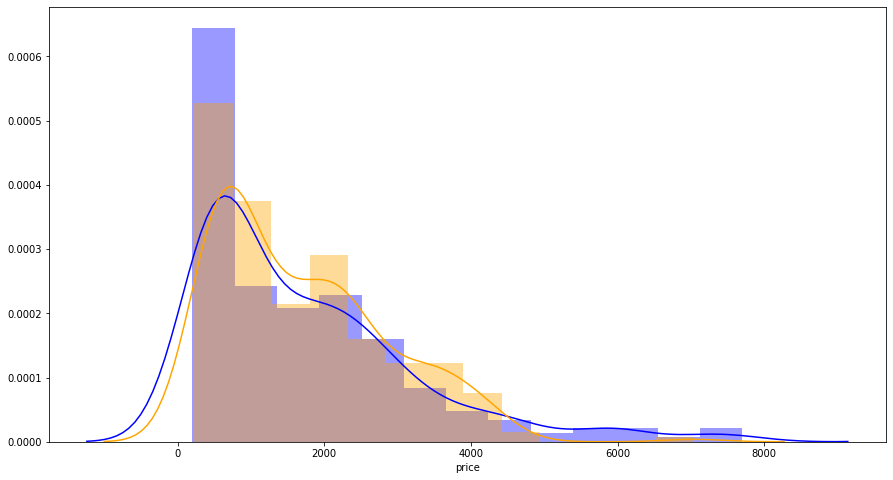

In [34]:
plt.figure(figsize=(15,8))
sns_plot1 = sns.distplot(y_test, color=('blue'))
sns_plot2 = sns.distplot(preds, color=('orange'))
fig = sns_plot.get_figure()

Как и ожидалось, наши предсказания более смещены к центру. (это отчасти потому, что дешёвой обуви у нас было сильно больше дорогой)

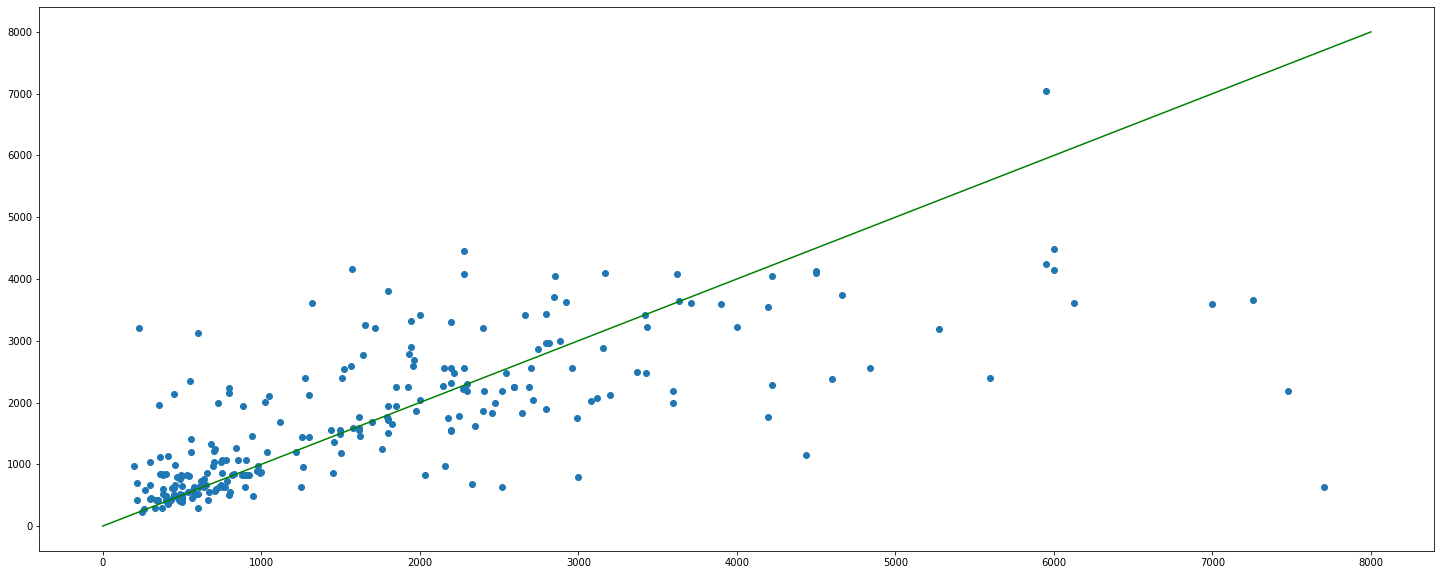

In [35]:
plt.figure(figsize=(25, 10))
x = (0, 8000)
y=lambda x: x
plt.plot(x, y(x), color = 'green')
plt.scatter(y_test, preds)
plt.show()

Немного по-другому смотрим на то же самое. В идеальном случае точки бы выстроились в диагональ. Получается, что модель полохо распознаёт дорогую продукцию (потому что у неё мало примеров на неё было).

Feature: 0, Score: 40682.41629
Feature: 1, Score: 36879.29533
Feature: 2, Score: 37541.58678
Feature: 3, Score: 53923.93682
Feature: 4, Score: 39500.71034
Feature: 5, Score: 49595.56027
Feature: 6, Score: 39062.69847
Feature: 7, Score: 40240.89287
Feature: 8, Score: 46821.78335
Feature: 9, Score: 48866.32496
Feature: 10, Score: 39677.06777
Feature: 11, Score: 65355.90179
Feature: 12, Score: 53760.78501
Feature: 13, Score: 40707.46458
Feature: 14, Score: 99277.40734
Feature: 15, Score: 37950.51616
Feature: 16, Score: 45881.63422
Feature: 17, Score: 36122.81060
Feature: 18, Score: 45653.65766
Feature: 19, Score: 37866.00533
Feature: 20, Score: 42884.61324
Feature: 21, Score: 37802.99492
Feature: 22, Score: 41104.01112
Feature: 23, Score: 38186.51445
Feature: 24, Score: 36400.99120
Feature: 25, Score: 70573.09747
Feature: 26, Score: 35398.94425
Feature: 27, Score: 39519.39142
Feature: 28, Score: 45159.53371
Feature: 29, Score: 44039.83936
Feature: 30, Score: 40499.26588
Feature: 31, Score

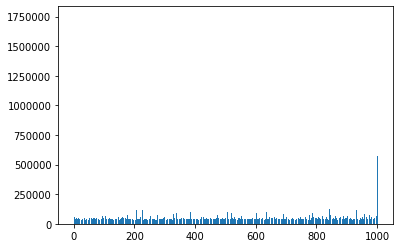

In [40]:
# Вот код, который показывает важность фичей.
# Картинка не очень показательная, но мы видим, что некоторые слова влияют больше, некоторые меньше.
# И три последние фичи (бренд, м/ж, длина описания), особенно бренд, сильно влияют.

from sklearn.inspection import permutation_importance
model = KNeighborsRegressor(n_neighbors=8, weights='distance', algorithm='auto', leaf_size=1, p=1, metric='euclidean')
X = X.toarray()
model.fit(X, y)
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
importance = results.importances_mean
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Как улучшить результат?

- Использовать что-то сильнее, чем регрессия (использовать нейросеть).
- Равномерно давать данные про возможные цены (а то у нас дешёвой обуви сильно больше) Например, мы могли бы сделать побольше примеров на дорогую обувь, поменяв слова в описаниях дорогой обуви на близкие синонимы.
- Векторизировать чем-то учитывающим контекст, а не просто наличие слов.
- Потратить время на оценку важности признаков. Наименее важные убрать, или как-то преобразовать.
- Придумать и использовать интересные фичи. Например, уделять особое внимание частотным n-граммам (latest fashion - признак дешёвой обуви). Учитывать эмоциональность, пунктуацию...

# Задание 2. Оценка по отзыву

Сделаем из наших данных просто табличку отзыв-оценка

In [41]:
Rev_Rat = pd.DataFrame()
for i in range(len(Shoes_Data)):
    list_reviews = Shoes_Data['reviews'][i].split('|| ')
    list_ratings = [int(float(rat[:3])) for rat in Shoes_Data['reviews_rating'][i].split('|| ')]
    df = pd.DataFrame(list(zip(list_reviews, list_ratings)), columns =['review', 'rating'])
    Rev_Rat = Rev_Rat.append(df)
Rev_Rat

,review,rating
0,Not happy with product,1
1,It's not as expected.,1
2,AVERAGE PRODUCT,3
3,Pic more beautiful,3
4,Got damage product. But quality is average for...,3
...,...,...
5,Go for it!,5
6,Excellent product,5
7,Nice shoe,5
8,Nice,5


In [42]:
# Удалили дубликаты
Rev_Rat = Rev_Rat.drop_duplicates(subset=['review', 'rating'], keep='first')

Добавляем длину отзыва и долю капса

In [43]:
Rev_Rat['len_of_review'] = Rev_Rat['review'].apply(lambda x: len(x))
Rev_Rat['supall_review'] = Rev_Rat['review'].apply(lambda x: sum(map(str.isupper, x))/len(x))

/Users/tbkazakova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/tbkazakova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
Rev_Rat.corr()

,rating,len_of_review,supall_review
rating,1.000000,-0.081662,0.014281
len_of_review,-0.081662,1.000000,-0.229135
supall_review,0.014281,-0.229135,1.000000


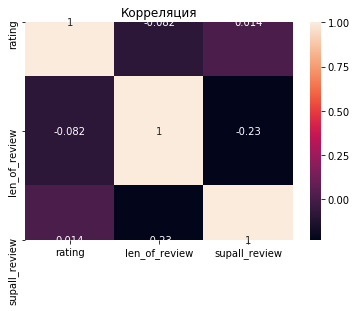

In [45]:
fig, ax = plt.subplots()
sns.heatmap(data=Rev_Rat.corr(), 
            annot=True, ax=ax)
plt.title("Корреляция")
plt.show()
# Как-то не очень капс и длина коррелируют с оценкой...

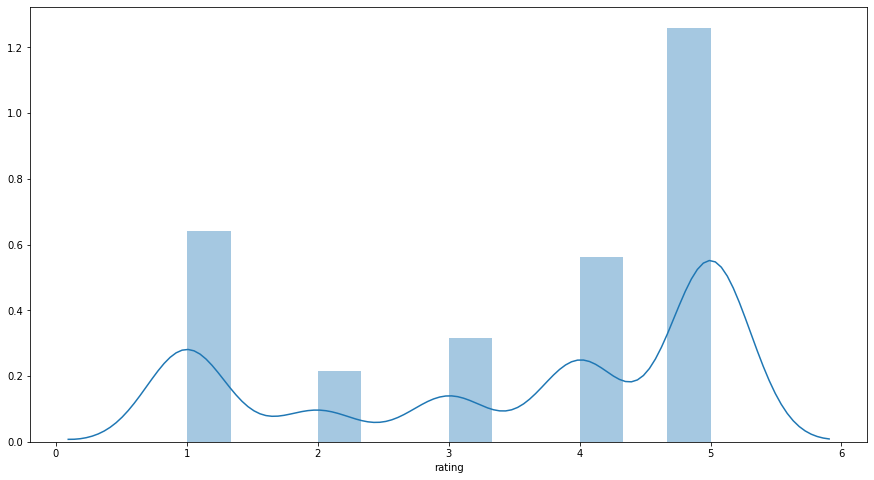

In [46]:
# Посмотрим как распределены оценки
plt.figure(figsize=(15,8))
sns_plot = sns.distplot(Rev_Rat['rating'])
fig = sns_plot.get_figure()
# Будем помнить, что положительных больше.

## Посмотрим на отзывы

In [50]:
lemmatizer = WordNetLemmatizer()
dop_stop = ['shoe', 'shoes', 'and', 'it', 'is', 'in', 'on', 'for', 'a',
            'to', 'with', 'go', 'was', 'the', 'of', 'as', 'from', 'so', 'at']
# Важно, чтоб not не удалились.

def cleantext(text):
    text = text
    tok_text = word_tokenize(text)
    words = [w.lower() for w in tok_text if w.isalpha() if w not in dop_stop]
    # это чистит от రన్నింగ్ и др.
    lemms = [lemmatizer.lemmatize(w) for w in words]
    return ' '.join(lemms)

Rev_Rat['clean_review'] = Rev_Rat['review'].apply(lambda x: cleantext(x))

/Users/tbkazakova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


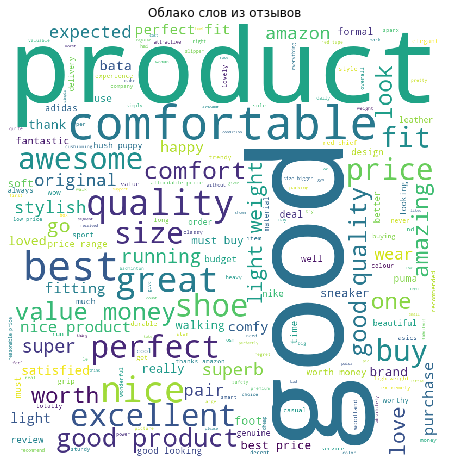

In [52]:
# Облако из положительных отзывов
descriptions = ' '.join(Rev_Rat['clean_review'][Rev_Rat['rating'].isin([5])].values)
wordcloud = WordCloud(background_color='white',
                      width=800,
                      height=800).generate(descriptions.lower())
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Облако слов из отзывов')
plt.show()

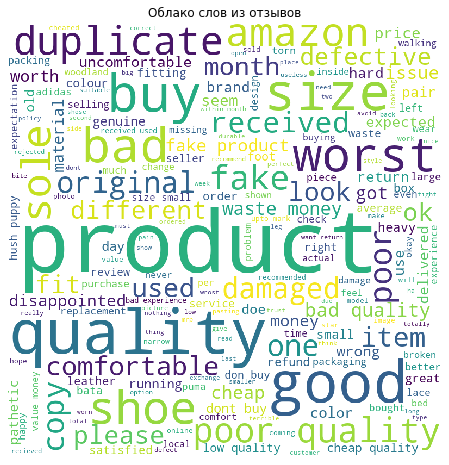

In [53]:
# Облако из отрицательных отзывов
descriptions = ' '.join(Rev_Rat['clean_review'][Rev_Rat['rating'].isin([1, 2])].values)
wordcloud = WordCloud(background_color='white',
                      width=800,
                      height=800).generate(descriptions.lower())
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Облако слов из отзывов')
plt.show()

Нам важны биграммы. Потому что в отрицательных тоже "good", только "not good".
### Делаем параметр про биграммы

In [54]:
descriptions = ' '.join(Rev_Rat['clean_review'][Rev_Rat['rating'].isin([5])].values)
bigr_l = list(nltk.bigrams(descriptions.split()))
bigr_counter_best = collections.Counter(bigr_l).most_common(100)
bigrs_best = [bigr[0][0] + " " + bigr[0][1] for bigr in bigr_counter_best]

descriptions = ' '.join(Rev_Rat['clean_review'][Rev_Rat['rating'].isin([1, 2])].values)
bigr_l = list(nltk.bigrams(descriptions.split()))
bigr_counter_worst = collections.Counter(bigr_l).most_common(100)
bigrs_worst = [bigr[0][0] + " " + bigr[0][1] for bigr in bigr_counter_worst]

In [56]:
for bigr in bigrs_best:
    if bigr in bigrs_worst:
        bigrs_worst.remove(bigr)
        bigrs_best.remove(bigr)

# Теперь у нас списки положительных и отрицательных биграмм

In [71]:
list_kolvo_best = []
for rev in Rev_Rat['clean_review']:
    kolvo_best = 0
    for bigr in bigrs_best:
        if bigr in rev:
            kolvo_best += 1
    list_kolvo_best.append(kolvo_best)

list_kolvo_worst = []
for rev in Rev_Rat['clean_review']:
    kolvo_worst = 0
    for bigr in bigrs_worst:
        if bigr in rev:
            kolvo_worst += 1
    list_kolvo_worst.append(kolvo_worst)

Rev_Rat['kolvo_best'] = list_kolvo_best
Rev_Rat['kolvo_worst'] = list_kolvo_worst

/Users/tbkazakova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/tbkazakova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#### При предсказании будем смотреть на отзыв и на кол-во некоторых положительных и отрацательных биграмм.

In [77]:
Task2 = Rev_Rat[['clean_review', 'kolvo_best', 'kolvo_worst', 'rating']]
Task2[['kolvo_best', 'kolvo_worst']] = sc.fit_transform(Task2[['kolvo_best', 'kolvo_worst']])
Task2

/Users/tbkazakova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/tbkazakova/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,clean_review,kolvo_best,kolvo_worst,rating
0,not happy product,-0.458948,1.305070,1
1,it not expected,-0.458948,3.018316,1
2,average product,-0.458948,-0.408175,3
3,pic more beautiful,-0.458948,-0.408175,3
4,got damage product but quality average,-0.458948,-0.408175,3
...,...,...,...,...
0,great,-0.458948,-0.408175,5
1,excellent quality,1.291282,-0.408175,5
2,old manufactured product being sold,-0.458948,-0.408175,3
4,old stock teared just month running,-0.458948,-0.408175,1


## Пробуем модели (классификация)
### BoW

In [79]:
BoW_vectorizer = CountVectorizer(max_features=1000, min_df=5, max_df=0.4, ngram_range=(1,2))

X = Task2[['clean_review', 'kolvo_best', 'kolvo_worst']]
y = Task2['rating']

X_train_manycols, X_test_manycols, y_train, y_test = train_test_split(X, y, random_state=42)

X_train_BoW = BoW_vectorizer.fit_transform(X_train_manycols['clean_review'])

X_train = hstack((X_train_BoW, X_train_manycols['kolvo_best'][:,None],
                  X_train_manycols['kolvo_worst'][:,None]))

# Добавили к разреженной матрице_BoW другие важные параметры, и показатели улучшились

In [111]:
logreg = LogisticRegression()

logreg_params = {'class_weight' : ['balanced', None],
                 'penalty' : ['l2', 'l1', 'elasticnet'],
                 'solver' : ['liblinear', 'saga'],
                 'C' : [0.5, 1.0],
                  'max_iter': [1000]
                 }

grid_search = GridSearchCV(logreg,
                           param_grid=logreg_params
                          )

grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

/Users/tbkazakova/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/tbkazakova/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/tbkazakova/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/tbkazakova/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/tbkazakova/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/tbkazakova/an

Best score: 0.564184456928839
Best parameters: {'C': 0.5, 'class_weight': None, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}


In [110]:
knc = KNeighborsClassifier()

knc_params = {'n_neighbors': [4, 5, 6],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [3, 5, 10, 15, 30],
              'p': [1, 2, 3],
              'metric': ['euclidean']
              }

grid_search = GridSearchCV(knc,
                           param_grid=knc_params,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.49125811485642945
Best parameters: {'algorithm': 'auto', 'leaf_size': 3, 'metric': 'euclidean', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}


In [116]:
rfc = RandomForestClassifier()

rfc_params = {'n_estimators':[80, 100, 120],
              'criterion': ['gini', 'entropy'],
              'min_samples_split': [2, 3],
              'min_samples_leaf': [1, 2, 3],
              'max_features': ['auto', 'sqrt', 'log2'],
             }

grid_search = GridSearchCV(rfc,
                           param_grid=rfc_params,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.5709272784019974
Best parameters: {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 120}


### Tfidf_vectorizer

In [119]:
Tfidf_vectorizer = TfidfVectorizer(max_features=1000, min_df=5, max_df=0.4)
X = Task2[['clean_review', 'kolvo_best', 'kolvo_worst']]
y = Task2['rating']

X_train_manycols, X_test_manycols, y_train, y_test = train_test_split(X, y, random_state=42)

X_train_Tfidf = Tfidf_vectorizer.fit_transform(X_train_manycols['clean_review'])
X_train = hstack((X_train_Tfidf, X_train_manycols['kolvo_best'][:,None],
                  X_train_manycols['kolvo_worst'][:,None]))

In [120]:
logreg = LogisticRegression()

logreg_params = {'class_weight' : ['balanced', None],
                 'penalty' : ['l2', 'l1', 'elasticnet'],
                 'solver' : ['liblinear', 'saga'],
                 'C' : [0.5, 1.0],
                  'max_iter': [1000]
                 }

grid_search = GridSearchCV(logreg,
                           param_grid=logreg_params
                          )

grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

/Users/tbkazakova/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/tbkazakova/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tbkazakova/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/tbkazakova/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", 

Best score: 0.5669325842696629
Best parameters: {'C': 1.0, 'class_weight': None, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}


In [121]:
knc = KNeighborsClassifier()

knc_params = {'n_neighbors': [4, 5, 6],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [3, 5, 10, 15, 30],
              'p': [1, 2, 3],
              'metric': ['euclidean']
              }

grid_search = GridSearchCV(knc,
                           param_grid=knc_params,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.4830134207240949
Best parameters: {'algorithm': 'auto', 'leaf_size': 3, 'metric': 'euclidean', 'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}


In [122]:
rfc = RandomForestClassifier()

rfc_params = {'n_estimators':[80, 100, 120],
              'criterion': ['gini', 'entropy'],
              'min_samples_split': [2, 3],
              'min_samples_leaf': [1, 2, 3],
              'max_features': ['auto', 'sqrt', 'log2'],
             }

grid_search = GridSearchCV(rfc,
                           param_grid=rfc_params,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.5646857053682897
Best parameters: {'criterion': 'gini', 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


##### C BoW получилось лучше, чем с Tfidfvectorizer. (потому что n-граммы)
Параметры для RandomForestClassifier: {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 120}.

Подберём параметры для BoW.

In [134]:
# BoW_vectorizer = CountVectorizer(max_features=1000, min_df=5, max_df=0.4, ngram_range=(1,2)) 0.5686813358302122
# BoW_vectorizer = CountVectorizer(max_features=1000, min_df=6, max_df=0.4, ngram_range=(1,2)) 0.5644332084893884
# BoW_vectorizer = CountVectorizer(max_features=1000, min_df=4, max_df=0.4, ngram_range=(1,2)) 0.5681800873907615
# BoW_vectorizer = CountVectorizer(max_features=1000, min_df=5, max_df=0.5, ngram_range=(1,2)) 0.5666819600499376
# BoW_vectorizer = CountVectorizer(max_features=1000, min_df=5, max_df=0.3, ngram_range=(1,2)) 0.5671813358302122
# BoW_vectorizer = CountVectorizer(max_features=1000, min_df=5, max_df=0.4, ngram_range=(1,4)) 0.5704297752808989
# BoW_vectorizer = CountVectorizer(max_features=1000, min_df=5, max_df=0.4, ngram_range=(1,5)) 0.5681788389513108

BoW_vectorizer = CountVectorizer(max_features=1000, min_df=5, max_df=0.4, ngram_range=(1,3))

X = Task2[['clean_review', 'kolvo_best', 'kolvo_worst']]
y = Task2['rating']

X_train_manycols, X_test_manycols, y_train, y_test = train_test_split(X, y, random_state=42)

X_train_BoW = BoW_vectorizer.fit_transform(X_train_manycols['clean_review'])

X_train = hstack((X_train_BoW, X_train_manycols['kolvo_best'][:,None],
                  X_train_manycols['kolvo_worst'][:,None]))

rfc = RandomForestClassifier()

rfc_params = {'n_estimators': [120],
              'criterion': ['gini'],
              'min_samples_split': [2],
              'min_samples_leaf': [2],
              'max_features': ['sqrt'],
             }

grid_search = GridSearchCV(rfc,
                           param_grid=rfc_params,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))

Best score: 0.5706782147315856


Подобрали параметры. Теперь пробуем на тесте.

In [137]:
BoW_vectorizer = CountVectorizer(max_features=1000, min_df=5, max_df=0.4, ngram_range=(1,3))
X = Task2[['clean_review', 'kolvo_best', 'kolvo_worst']]
y = Task2['rating']

X_BoW = BoW_vectorizer.fit_transform(X['clean_review'])
X = hstack((X_BoW, X['kolvo_best'][:,None], X['kolvo_worst'][:,None]))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rfc = RandomForestClassifier(n_estimators=120, criterion='gini',min_samples_split=2,
                             min_samples_leaf=2, max_features='sqrt')

rfc.fit(X_train, y_train)
preds = rfc.predict(X_test)
print(accuracy_score(y_test, preds))
# Вот такой результат

0.6


## Анализ качества решения и т.д.

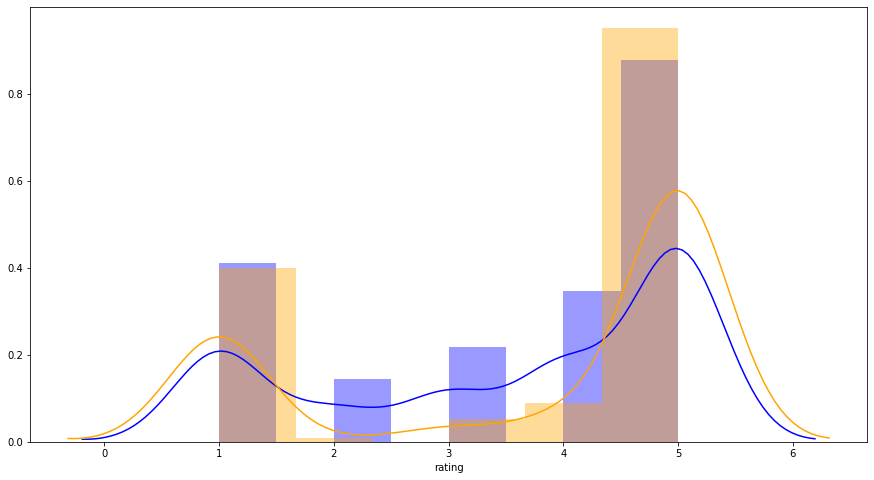

In [138]:
plt.figure(figsize=(15,8))
sns_plot1 = sns.distplot(y_test, color=('blue'))
sns_plot2 = sns.distplot(preds, color=('orange'))
fig = sns_plot.get_figure()

Как и ожидалось, модель чаще предлагает бОльшие классы.

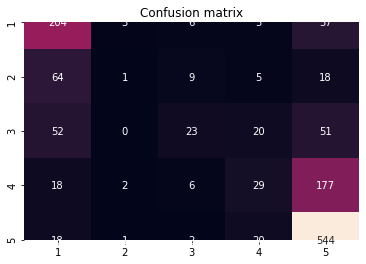

In [144]:
fig, ax = plt.subplots()
classes = [1, 2, 3, 4, 5]
sns.heatmap(data=confusion_matrix(y_test, preds), annot=True, fmt="d", cbar=False)
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)
plt.title("Confusion matrix")
plt.show()

Ну вот, получается, что 3й и ОСОБЕННО 4й класс часто путается с 5м, а 2й и 3й пореже с 1м.

Как улучшить результат?

!! Давать равномерно распределённые данные (а то у нас 1 и 5 частотнее). Можно было наделать синонимичные отзывы дл 2,3,4 классов. Надо было делать не только самые отрицательные и положительные биграммы, а особенные биграммы для каждого из классов.

!! Учитывать nграммы (благодаря ним BoW победил Tfidf)

А также:
- Исспользовать что-то мощнее (нейросети).
- Учитывать смайлики.
- Делать анализ тональности.
- Векторизировать чем-то учитывающим контекст, а не просто наличие слов.
- Потратить время на оценку важности признаков. Наименее важные убрать, или как-то преобразовать.